# Install Dependencies

In [ ]:
!conda install -c anaconda -y networkx
!conda install -c anaconda -y requests
!conda install -c anaconda -y pandas # Important
!conda install -c conda-forge -y geopandas
!conda install -c anaconda -y scipy # Important
!conda install -c anaconda -y numpy
!conda install -c anaconda -y scikit-learn # Important Maybe
!conda install -y osmnx=0.11.4

In [3]:
# Import the notebook with some useful functions
%run util.ipynb

# Read Data

In [4]:
test = pd.read_csv('data/processed_test.zip')
train = pd.read_csv('data/processed_train.zip')

In [11]:
print(test.shape)
print(train.shape)

(790891, 16)
(3927323, 16)


In [5]:
# Remove everything outside Manhattan area rectangle
test = test[(test.pickup_longitude.between(-74.02, -73.91)) &\
            (test.pickup_latitude.between(40.70, 40.86)) & \
            (test.dropoff_longitude.between(-74.02, -73.91)) &\
            (test.dropoff_latitude.between(40.70, 40.86))]
train = train[(train.pickup_longitude.between(-74.02, -73.91)) &\
            (train.pickup_latitude.between(40.70, 40.86)) & \
            (train.dropoff_longitude.between(-74.02, -73.91)) &\
            (train.dropoff_latitude.between(40.70, 40.86))]

In [13]:
print(test.shape)
print(train.shape)

(710982, 16)
(3343247, 16)


In [14]:
train.head()

,Unnamed: 0,dropoff_datetime,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id,node_lat,node_lng,order,osm_node
0,0,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.750751,-73.968402,0,42444055
1,1,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.751748,-73.970804,1,42442947
2,2,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.752692,-73.973037,2,42444051
3,3,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.753367,-73.974648,3,42444049
4,4,2016-02-18 23:59:21,40.759827,-73.98983,id3070143,1,2016-02-18 23:50:13,40.750599,-73.968559,N,548,1,40.754349,-73.976974,4,42443810


# Get Graph (map)

* Get a graph (nodes and edges) of a preferred location using string address
* Plot a random route just as demo
* This demo shows how to get the best route (theoritcally) between two coordinats (it is relatively slow process)
* You only need to use this if you want to imporve the data we already created as we already saved the best routes in the csv

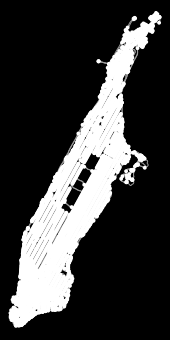

In [9]:
G = get_graph('Manhattan, New York City, New York, USA')

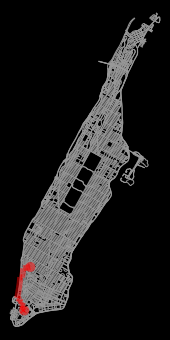

In [10]:
plot_route(G, (40.735018, -74.003215), (40.710040, -74.007163))

# Example (geoindex)

* Here we create a KDTree and demo how to get nearest points from our dataframe with O(1) time

In [11]:
noise = pd.np.random.uniform(0, 0.000001, size=(len(train), 2))
tree = KDTree(data=train[['node_lat', 'node_lng']].values + noise)

<ipython-input-11-106dd07d7312>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  noise = pd.np.random.uniform(0, 0.000001, size=(len(train), 2))


In [12]:
train.iloc[tree.query_ball_point((40.735018, -74.003215), 0.0003)]

,Unnamed: 0,dropoff_datetime,dropoff_latitude,dropoff_longitude,id,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_duration,vendor_id,node_lat,node_lng,order,osm_node
1620548,1620548,2016-01-13 16:30:18,40.734341,-74.008522,id0748042,1,2016-01-13 16:20:39,40.740768,-73.990120,N,579,1,40.734891,-74.003153,17,42452598
3085896,3085896,2016-01-11 14:39:53,40.734604,-74.005981,id1387519,1,2016-01-11 14:32:36,40.735985,-73.993614,N,437,1,40.734891,-74.003153,9,42452598
380214,380214,2016-01-29 21:41:27,40.734695,-74.004646,id0056842,1,2016-01-29 21:32:39,40.726124,-74.001450,N,528,2,40.734891,-74.003153,17,42452598
435011,435011,2016-02-12 00:36:45,40.738144,-74.009048,id1777013,1,2016-02-12 00:30:48,40.733734,-74.002335,N,357,2,40.734891,-74.003153,3,42452598
1610027,1610027,2016-02-27 20:47:05,40.740192,-74.005653,id3546252,1,2016-02-27 20:42:35,40.734051,-74.002876,N,270,2,40.734891,-74.003153,1,42452598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494943,2494943,2016-02-01 21:30:34,40.733326,-74.008400,id1247731,1,2016-02-01 21:24:48,40.736771,-73.997513,N,346,1,40.734891,-74.003153,7,42452598
2756240,2756240,2016-06-23 09:52:01,40.734192,-74.010040,id1145728,2,2016-06-23 09:40:29,40.724884,-73.994331,N,692,1,40.734891,-74.003153,19,42452598
3211168,3211168,2016-04-01 07:13:03,40.733700,-74.006920,id0665117,1,2016-04-01 07:02:43,40.730759,-73.982979,N,620,2,40.734891,-74.003153,14,42452598
1031658,1031658,2016-06-04 19:15:45,40.735500,-74.003357,id2725912,2,2016-06-04 18:55:26,40.726292,-73.980324,N,1219,2,40.734891,-74.003153,20,42452598


# Baseline

* Here we are predicting that all taxi rides in the test set will take simply the average time in the training set
* This is the baseline to beat

In [13]:
# Calc mean trip duration in the training set
mean = train.groupby('id').agg({'trip_duration': 'first'}).mean()
test['pred'] = mean['trip_duration']
mean

trip_duration    871.235925
dtype: float64

In [14]:
# Evaluate
evaluate(test, 'trip_duration', 'pred')

1.0872240148148207